In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [61]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Statistical Overview of Dataset

In [62]:
def statistical_overview(df):
    print("="*60)
    print("DATASET OVERVIEW")
    print("="*60)
    
    #Basic Information
    print(f"\nTotal Rows: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}")
    print("\nColumn Names:\n", list(df.columns))
    
    #Data Types
    print("\nData Types:")
    print(df.dtypes)
    
   
    
    #Summary Statistics
    print("\nStatistical Summary (Numeric Columns):")
    print(df.describe().T)
    
    #Unique and Duplicate Information
    print("\nUnique Values per Column:")
    print(df.nunique())
    print("\nDuplicate Rows:", df.duplicated().sum())
    
    #Sample Data Views
    print("\n📋 Top 10 Rows:\n", df.head(10))
    print("\n📋 Last 10 Rows:\n", df.tail(10))
    print("\n📋 Random Sample (10 Rows):\n", df.sample(10))
    
    #DataFrame Info
    print("\nDetailed DataFrame Information:")
    df.info()
statistical_overview(df)

DATASET OVERVIEW

Total Rows: 1470
Total Columns: 35

Column Names:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Data Types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount      

#### CHECK THE MISSING VALUE

In [63]:
print("missing_value")
for col in df.columns:
    misssing_value=df[col].isna().sum()
    percentage=misssing_value*100/len(df)
    print('%s: %.2f%% (%d)' %(col, percentage, misssing_value))
print('handle duplicated')
print(f"sum of duplicated {df.duplicated().sum()}")

missing_value
Age: 0.00% (0)
Attrition: 0.00% (0)
BusinessTravel: 0.00% (0)
DailyRate: 0.00% (0)
Department: 0.00% (0)
DistanceFromHome: 0.00% (0)
Education: 0.00% (0)
EducationField: 0.00% (0)
EmployeeCount: 0.00% (0)
EmployeeNumber: 0.00% (0)
EnvironmentSatisfaction: 0.00% (0)
Gender: 0.00% (0)
HourlyRate: 0.00% (0)
JobInvolvement: 0.00% (0)
JobLevel: 0.00% (0)
JobRole: 0.00% (0)
JobSatisfaction: 0.00% (0)
MaritalStatus: 0.00% (0)
MonthlyIncome: 0.00% (0)
MonthlyRate: 0.00% (0)
NumCompaniesWorked: 0.00% (0)
Over18: 0.00% (0)
OverTime: 0.00% (0)
PercentSalaryHike: 0.00% (0)
PerformanceRating: 0.00% (0)
RelationshipSatisfaction: 0.00% (0)
StandardHours: 0.00% (0)
StockOptionLevel: 0.00% (0)
TotalWorkingYears: 0.00% (0)
TrainingTimesLastYear: 0.00% (0)
WorkLifeBalance: 0.00% (0)
YearsAtCompany: 0.00% (0)
YearsInCurrentRole: 0.00% (0)
YearsSinceLastPromotion: 0.00% (0)
YearsWithCurrManager: 0.00% (0)
handle duplicated
sum of duplicated 0


#### Drop Unneeded Columns

In [64]:
drop_cols =[
    'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'DailyRate', 'HourlyRate', 'MonthlyRate'
]
df = df.drop(columns=drop_cols)

In [65]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


#### HR KPI SUMMARY

In [66]:
def hr_kpi_summary(df):
    print("="*70)
    print("🏢 HUMAN RESOURCE ANALYTICS - KPI SUMMARY")
    print("="*70)

    # Total Employees
    total_employees=df.shape[0]
    print(f"\n Total Emploeyees: {total_employees}")

    # Attrition Rate 
    if 'Attrition' in df.columns:
        attrition_rate = (df['Attrition'].value_counts(normalize=True).get('Yes',0)) * 100
        print(f" Attrition Rate: {attrition_rate:.2f}%")
        
    # Average Age
    Average_age= df['Age'].mean().round(2)
    print(f"Average Age: {Average_age} years")

    #Average Monthly Income
    MonthlyIncome = df['MonthlyIncome'].mean().round(0)
    print(f"💰 Average Monthly Income: ₹{MonthlyIncome}")

    # Gender ratio
    gender_ratio = df['Gender'].value_counts(normalize=True) * 100
    print("\n⚖️ Gender Ratio (%):")
    print(gender_ratio.round(2).to_string())

    #Average Years at Company
    if 'YearsAtCompany' in df.columns:
        print(f"📅 Average Years at Company: {df['YearsAtCompany'].mean().round(1)}")

    #Average Job Satisfaction
    if 'JobSatisfaction' in df.columns:
        print(f"😊 Average Job Satisfaction: {df['JobSatisfaction'].mean().round(2)} / 5")
    
    #Education Field Distribution 
    if 'EducationField' in df.columns:
        print("\n🎓 Education Field Distribution (%):")
        print((df['EducationField'].value_counts(normalize=True) * 100).round(2).to_string())

    #Department-wise Attrition
    if {'Department', 'Attrition'}.issubset(df.columns):
        print("\n🏢 Department-wise Attrition (%):")
        dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
        print(dept_attrition.round(2))


    #Performance Rating
    if 'PerformanceRating' in df.columns:
        print("\n🏆 Performance Rating Distribution (%):")
        print((df['PerformanceRating'].value_counts(normalize=True) * 100).round(2).to_string())

     #Business Travel Distribution
    if 'BusinessTravel' in df.columns:
        print("\nBusiness Travel Distribution (%):")
        print((df['BusinessTravel'].value_counts(normalize=True) * 100).round(2).to_string())

    print("\n✅ KPI Summary Completed Successfully.")
    print("="*70)

hr_kpi_summary(df)

    

    

🏢 HUMAN RESOURCE ANALYTICS - KPI SUMMARY

 Total Emploeyees: 1470
 Attrition Rate: 16.12%
Average Age: 36.92 years
💰 Average Monthly Income: ₹6503.0

⚖️ Gender Ratio (%):
Gender
Male      60.0
Female    40.0
📅 Average Years at Company: 7.0
😊 Average Job Satisfaction: 2.73 / 5

🎓 Education Field Distribution (%):
EducationField
Life Sciences       41.22
Medical             31.56
Marketing           10.82
Technical Degree     8.98
Other                5.58
Human Resources      1.84

🏢 Department-wise Attrition (%):
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63

🏆 Performance Rating Distribution (%):
PerformanceRating
3    84.63
4    15.37

Business Travel Distribution (%):
BusinessTravel
Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20

✅ KPI Summary Completed Successfully.


In [67]:
def attrition_kpi_summary(df):
    print("="*70)
    print("🚪 EMPLOYEE ATTRITION ANALYSIS - KPI SUMMARY")
    print("="*70)
    
    #Check if 'Attrition' column exists
    if 'Attrition' not in df.columns:
        print("Error: 'Attrition' column not found in dataset!")
        return
    
    #Total Employees
    total_employees = df.shape[0]
    print(f"\n👥 Total Employees: {total_employees}")
    
    #Attrition Counts and Rate
    attrition_counts = df['Attrition'].value_counts()
    attrition_rate = attrition_counts.get('Yes', 0) / total_employees * 100
    print(f"Employees Left: {attrition_counts.get('Yes', 0)}")
    print(f"Employees Staying: {attrition_counts.get('No', 0)}")
    print(f"Attrition Rate: {attrition_rate:.2f}%")
    
    #Average Age of Attrited Employees
    if 'Age' in df.columns:
        avg_age_left = df[df['Attrition'] == 'Yes']['Age'].mean()
        print(f"Average Age (Attrited Employees): {avg_age_left:.1f} years")
    
    #Average Monthly Income (Attrited vs Stayed)
    if 'MonthlyIncome' in df.columns:
        income_compare = df.groupby('Attrition')['MonthlyIncome'].mean()
        print("\nAverage Monthly Income:")
        print(income_compare.round(2).to_string())
    
    #Department-wise Attrition Rate
    if 'Department' in df.columns:
        dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
        print("\nDepartment-wise Attrition (%):")
        print(dept_attrition.round(2))
    
    #Gender-wise Attrition Rate
    if 'Gender' in df.columns:
        gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
        print("\nGender-wise Attrition (%):")
        print(gender_attrition.round(2))
    
    #Job Role-wise Attrition
    if 'JobRole' in df.columns:
        role_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
        print("\nJob Role-wise Attrition (%):")
        print(role_attrition.round(2))
    
    #Education Field-wise Attrition
    if 'EducationField' in df.columns:
        edu_attrition = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
        print("\nEducation Field-wise Attrition (%):")
        print(edu_attrition.round(2))
    
    #Business Travel & Attrition
    if 'BusinessTravel' in df.columns:
        travel_attrition = df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
        print("\nBusiness Travel-wise Attrition (%):")
        print(travel_attrition.round(2))
    
    #Years at Company (Average comparison)
    if 'YearsAtCompany' in df.columns:
        years_compare = df.groupby('Attrition')['YearsAtCompany'].mean()
        print("\nAverage Years at Company:")
        print(years_compare.round(2).to_string())
    
    print("\nAttrition KPI Summary Completed Successfully.")
    print("="*70)
attrition_kpi_summary(df)

🚪 EMPLOYEE ATTRITION ANALYSIS - KPI SUMMARY

👥 Total Employees: 1470
Employees Left: 237
Employees Staying: 1233
Attrition Rate: 16.12%
Average Age (Attrited Employees): 33.6 years

Average Monthly Income:
Attrition
No     6832.74
Yes    4787.09

Department-wise Attrition (%):
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63

Gender-wise Attrition (%):
Attrition     No    Yes
Gender                 
Female     85.20  14.80
Male       82.99  17.01

Job Role-wise Attrition (%):
Attrition                     No    Yes
JobRole                                
Healthcare Representative  93.13   6.87
Human Resources            76.92  23.08
Laboratory Technician      76.06  23.94
Manager                    95.10   4.90
Manufacturing Director     93.10   6.90
Research Director          97.50   2.50
Research Scientist         83.90  16.10
Sales Executive        

#### Overall Attrition

Attrition
No     1233
Yes     237
Name: count, dtype: int64


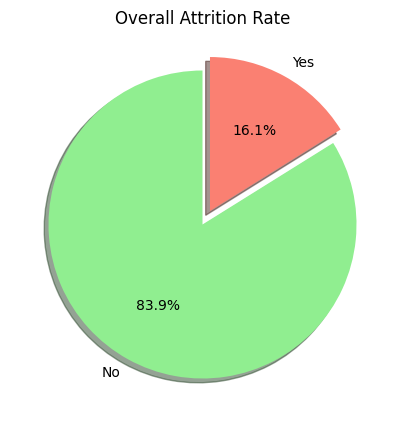

In [68]:
plt.figure(figsize=(5,5))
print(df['Attrition'].value_counts())
df['Attrition'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    explode=(0, 0.1),
    shadow=True
    )
plt.title("Overall Attrition Rate")
plt.ylabel("")
plt.show()

#### Department-wise Attrition Count

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: count, dtype: int64


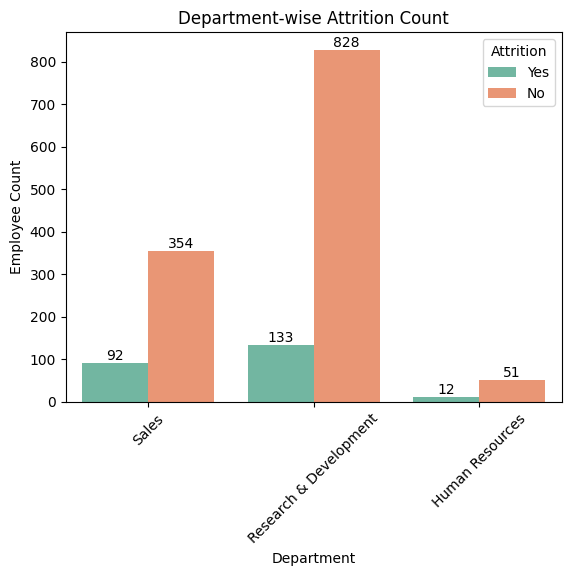

In [69]:
grouped=df.groupby('Department')['Attrition'].value_counts()
print(grouped)
ax=sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Department-wise Attrition Count")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.show()

#### Gender-wise Attrition Rate

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: count, dtype: int64


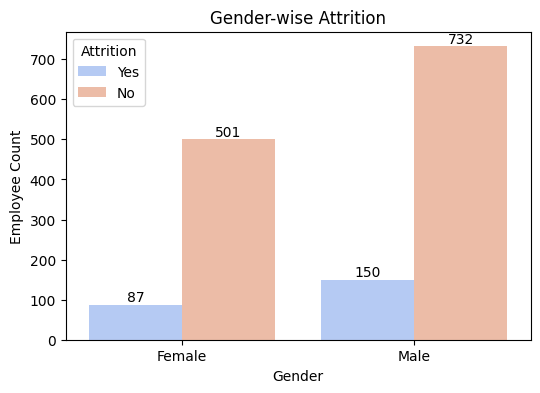

In [70]:
grouped=df.groupby('Gender')['Attrition'].value_counts()
print(grouped)
plt.figure(figsize=(6,4))
ax=sns.countplot(data=df, x='Gender', hue='Attrition', palette='coolwarm')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Gender-wise Attrition")
plt.xlabel("Gender")
plt.ylabel("Employee Count")
plt.show()

#### Age Distribution by Attrition

AgeGroup  Attrition
0-10      No             0
          Yes            0
10-20     Yes           10
          No             7
20-30     No           228
          Yes           81
30-40     No           533
          Yes           89
40-50     No           315
          Yes           34
50-60     No           145
          Yes           23
Name: count, dtype: int64


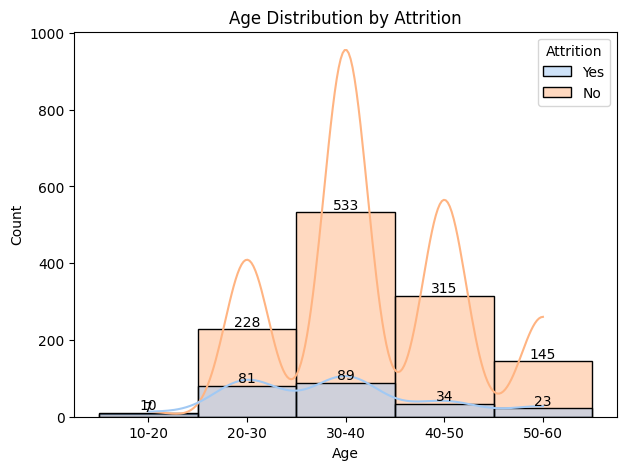

In [71]:
bins = range(0, 70, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
grouped=df.groupby('AgeGroup')['Attrition'].value_counts()
print(grouped)
plt.figure(figsize=(7,5))
ax=sns.histplot(data=df, x='AgeGroup', hue='Attrition', bins=20, kde=True, palette='pastel')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Age Distribution by Attrition")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Average Age & Income by Attrition Status:
            Age  MonthlyIncome
Attrition                     
No         37.6         6832.7
Yes        33.6         4787.1


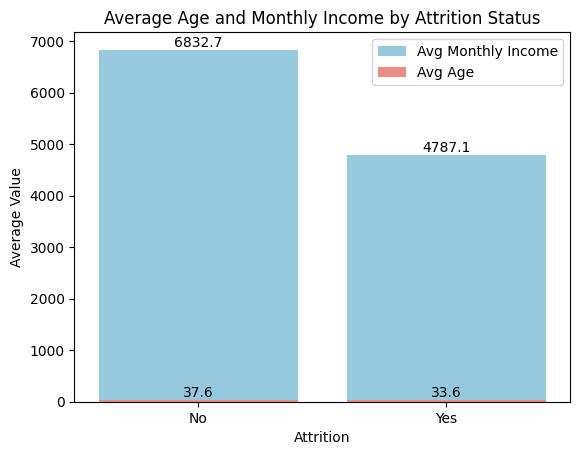

In [72]:
avg_data = df.groupby('Attrition')[['Age', 'MonthlyIncome']].mean().round(1)
print("\nAverage Age & Income by Attrition Status:")
print(avg_data)
ax=sns.barplot(data=avg_data, x='Attrition', y='MonthlyIncome', color='skyblue', label='Avg Monthly Income')
sns.barplot(data=avg_data, x='Attrition', y='Age', color='salmon', label='Avg Age')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Average Age and Monthly Income by Attrition Status")
plt.ylabel("Average Value")
plt.legend()
plt.show()


In [73]:
# Encode categorical variables
le=LabelEncoder()
df_encoded= df.apply(lambda col: le.fit_transform(col) if col.dtypes == 'object' else col)

X = df_encoded.drop(['Attrition', 'AgeGroup'], axis=1)
y = df_encoded['Attrition']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.3, random_state=42
)
print(X.shape, X_train.shape, X_test.shape)

(1470, 27) (1029, 27) (441, 27)


In [75]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [76]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]


In [77]:


# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtypes == 'object' else col)

X = df_encoded.drop(['Attrition','AgeGroup'], axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[367  13]
 [ 47  14]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       380
           1       0.52      0.23      0.32        61

    accuracy                           0.86       441
   macro avg       0.70      0.60      0.62       441
weighted avg       0.84      0.86      0.84       441



In [78]:
#accuracy on training data
y_pred=model.predict(X_train)
y_pred2=model.predict(X_test)
print(y_pred[:10])
print(le.inverse_transform(y_pred[:10]))

[0 0 1 0 0 0 0 0 0 0]
['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [79]:
### make predition
y_pred=model.predict(X_test)
comparison=pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':y_pred

})
print(comparison.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       1          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


In [80]:
print("Accuracy:",accuracy_score(y_test,y_pred.round(2)))
print("Precision:",precision_score(y_test,y_pred.round(2)))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.8639455782312925
Precision: 0.5185185185185185
Recall: 0.22950819672131148
F1 Score: 0.3181818181818182

Confusion Matrix:
 [[367  13]
 [ 47  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       380
           1       0.52      0.23      0.32        61

    accuracy                           0.86       441
   macro avg       0.70      0.60      0.62       441
weighted avg       0.84      0.86      0.84       441



In [82]:
df.to_csv('cleaned_hr_data.csv', index=False)
